<a href="https://colab.research.google.com/github/ArmstrongVo/VoTrongLuan.github.io/blob/main/VNFOOD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from os import listdir           # import thư viện 
from numpy import asarray,save
from keras.utils import load_img, img_to_array

folder = '/content/drive/MyDrive/DATA FOR AI/VN FOOD/TRAIN/'    # kết nối tới thư mục chứa data train 
photos, labels = list(), list()
for file in listdir(folder) :
  output = 0.0
  if file.startswith('Pho'):
    output = 1.0
  if file.startswith('My_Quang'):
    output = 2.0
  if file.startswith('Goi_Cuon'):
    output = 3.0
  if file.startswith('Com_Tam'):
    output = 4.0
  if file.startswith('Chao_Long'):
    output = 5.0
  if file.startswith('Bun_Dau_Mam_Tom'):
    output = 6.0
  if file.startswith('Bun_Bo_Hue'):
    output = 7.0
  if file.startswith('Banh_Xeo'):
    output = 8.0
  if file.startswith('Banh_Mi'):
    output = 9.0
  if file.startswith('Banh_Cuon'):
    output = 10.0
  photo = load_img(folder + file, target_size = (150,150))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)
photos_train = asarray(photos)
labels_train = asarray(labels)
print(photos_train.shape, labels_train.shape)
save('/content/drive/MyDrive/DATA FOR AI/photo.npy',photos_train)
save('/content/drive/MyDrive/DATA FOR AI/label.npy',labels_train)



(4510, 150, 150, 3) (4510,)


In [7]:
folder = '/content/drive/MyDrive/DATA FOR AI/VN FOOD/TEST/'

photos, labels = list(), list()
for file in listdir(folder) :
  output = 0.0
  if file.startswith('Pho'):
    output = 1.0
  if file.startswith('My_Quang'):
    output = 2.0
  if file.startswith('Goi_Cuon'):
    output = 3.0
  if file.startswith('Com_Tam'):
    output = 4.0
  if file.startswith('Chao_Long'):
    output = 5.0
  if file.startswith('Bun_Dau_Mam_Tom'):
    output = 6.0
  if file.startswith('Bun_Bo_Hue'):
    output = 7.0
  if file.startswith('Banh_Xeo'):
    output = 8.0
  if file.startswith('Banh_Mi'):
    output = 9.0
  if file.startswith('Banh_Cuon'):
    output = 10.0
  photo = load_img(folder + file, target_size = (150,150))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)
photos_test = asarray(photos)
labels_test = asarray(labels)
print(photos_test.shape, labels_test.shape)
save('/content/drive/MyDrive/DATA FOR AI/VN FOOD/photo.npy',photos_test)
save('/content/drive/MyDrive/DATA FOR AI/VN FOOD/label.npy',labels_test)


class_name = {1: 'Phở',2: 'mỳ quảng',3: 'gỏi cuốn',4: 'cơm tấm',5: 'cháo lòng',
              6: 'bún đậu mắm tôm',7: 'bún bò huế',8:'bánh xèo',9:'bánh mì',10:'bánh cuốn'}
     

(500, 150, 150, 3) (500,)


In [8]:
photos_train = photos_train.reshape(4510, 150, 150, 3)
photos_train = photos_train.astype('float32')/255 
photos_test = photos_test.reshape(500, 150, 150, 3)
photos_test = photos_test.astype('float32')/255

from keras.utils import  to_categorical
labels_train = to_categorical(labels_train)
labels_test = to_categorical(labels_test)
photos_train.shape, labels_train.shape, photos_test.shape, labels_test.shape

((4510, 150, 150, 3), (4510, 11), (500, 150, 150, 3), (500, 11))

In [9]:
from keras.models import Sequential, Model
from keras import Input, Model
from keras.optimizers import Adam
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization, LeakyReLU
batch_size = 64
epochs = 15
classes = 11


model = Sequential()
#CNN
model.add(Conv2D(32, kernel_size = (3,3), activation = 'linear',
                 input_shape = (150,150,3), padding = 'same')) 

model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(64, (3,3), activation = 'linear', padding ='same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(128, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

#ANN
model.add(Flatten())
model.add(Dense(128, activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(classes, activation ='softmax'))
     

In [10]:
#compile
model.compile(optimizer = Adam(), loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])
model.summary()

train = model.fit(photos_train, labels_train, batch_size = batch_size , 
                  epochs = epochs, verbose = 1)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 75, 75, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 38, 38, 64)       0         
 2D)                                                    

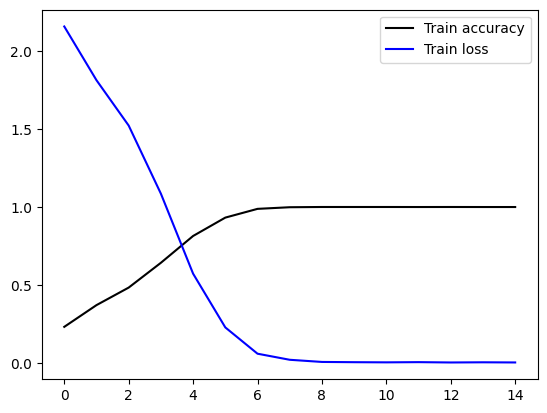

In [11]:
import matplotlib.pyplot as plt
import numpy as np

accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'k', label = 'Train accuracy')
plt.plot(epochs, loss, 'b', label = 'Train loss')
plt.legend(['Train accuracy', 'Train loss'])
plt.show()
     

In [12]:
model.save('/content/drive/MyDrive/DATA FOR AI/VN FOOD/FOOD.h5')

1/1 [==============================] - 0s 233ms/step
Predicted:  bánh mì


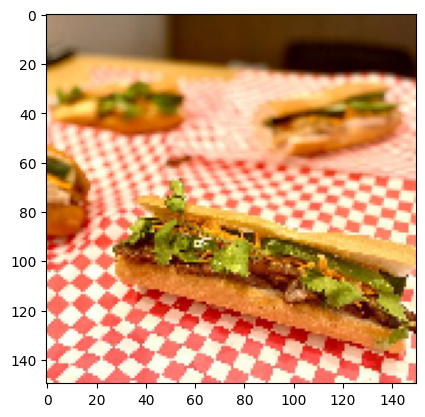

In [14]:
#test
filePath = '/content/drive/MyDrive/DATA FOR AI/VN FOOD/TEST/Banh_Mi 45.jpg'
testImage = load_img(filePath, color_mode = 'rgb', target_size=(150,150))
arrayImage = img_to_array(testImage).reshape(1,150,150,3)/255
pred = np.argmax(model.predict(arrayImage))
print("Predicted: ", class_name[pred])
plt.imshow(testImage)

1/1 [==============================] - 0s 31ms/step
Predicted:  bánh cuốn


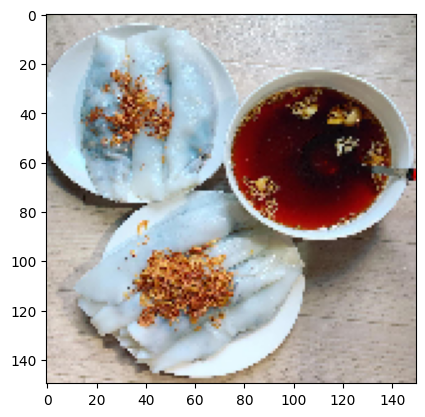

In [15]:
#test
filePath = '/content/drive/MyDrive/DATA FOR AI/VN FOOD/TEST/Banh_Cuon 15.jpg'
testImage = load_img(filePath, color_mode = 'rgb', target_size=(150,150))
arrayImage = img_to_array(testImage).reshape(1,150,150,3)/255
pred = np.argmax(model.predict(arrayImage))
print("Predicted: ", class_name[pred])
plt.imshow(testImage)

1/1 [==============================] - 0s 21ms/step
Predicted:  cháo lòng


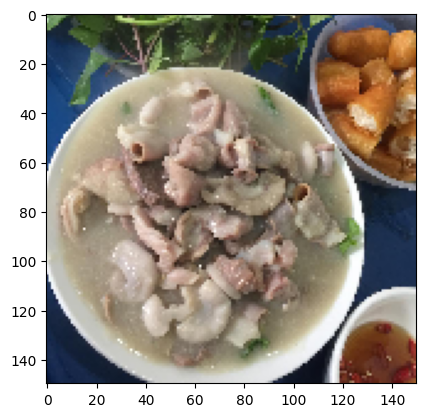

In [17]:
#test
filePath = '/content/drive/MyDrive/DATA FOR AI/VN FOOD/TEST/Chao_Long 3.jpg'
testImage = load_img(filePath, color_mode = 'rgb', target_size=(150,150))
arrayImage = img_to_array(testImage).reshape(1,150,150,3)/255
pred = np.argmax(model.predict(arrayImage))
print("Predicted: ", class_name[pred])
plt.imshow(testImage)